In [1]:
#################Importação das Bibliotecas#########################

In [2]:
############importação de biblioteca para análise de dados e manipulação############
import numpy as np
import pandas as pd
###############Importação da bibliotecas para gráficos##############################
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns
################Importação das bibliotecas do Modelo de Machine Learning################
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.metrics import accuracy_score 
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from enum import Enum


In [3]:
#######################Carregando dados###############################
##########Dados queimadas - Para os Estados da Amazônia Legal######
url_areas_queimadas = 'https://drive.google.com/file/d/1vRVra-yLlZxknweY-6YIQQJjWCqK75mT/view?usp=sharing'
url_areas_queimadas='https://drive.google.com/uc?id=' + url_areas_queimadas.split('/')[-2]

##########Dados queimadas - Para os Outros Estados##########
url_queimadas_mais_estados = 'https://drive.google.com/file/d/1VdFxMxEWzUuqYLTfv2grmFD2tDRdOez-/view?usp=sharing'
url_queimadas_mais_estados='https://drive.google.com/uc?id=' + url_queimadas_mais_estados.split('/')[-2]

##########Dados sobre Desmatamento - Amazônia Legal##########
url_areas_desmatadas = 'https://drive.google.com/file/d/1gF9JQPHV7dbviqLl8Z-MY_C8iyF1OREd/view?usp=sharing'
url_areas_desmatadas='https://drive.google.com/uc?id=' + url_areas_desmatadas.split('/')[-2]


In [4]:
def importa_dados(url_areas_queimadas,url_queimadas_mais_estados,url_areas_desmatadas):
    tabela_areas_queimadas = pd.read_csv(url_areas_queimadas)
    tabela_areas_queimadas_mais_estados = pd.read_csv(url_queimadas_mais_estados,encoding='latin-1')
    tabela_areas_desmatadas = pd.read_csv(url_areas_desmatadas,encoding='latin-1')
    return tabela_areas_queimadas,tabela_areas_queimadas_mais_estados,tabela_areas_desmatadas

In [5]:
tabela_areas_queimadas,tabela_areas_queimadas_mais_estados,tabela_areas_desmatadas = importa_dados(url_areas_queimadas,url_queimadas_mais_estados,url_areas_desmatadas)

In [6]:
#Definir dados

In [7]:
#############Analises dos Dataframes##############################

In [8]:
print(tabela_areas_desmatadas.info())
print(tabela_areas_desmatadas.columns)
print(tabela_areas_desmatadas.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ï»¿Ano/Estados  16 non-null     int64
 1   AC              16 non-null     int64
 2   AM              16 non-null     int64
 3   AP              16 non-null     int64
 4   MA              16 non-null     int64
 5   MT              16 non-null     int64
 6   PA              16 non-null     int64
 7   RO              16 non-null     int64
 8   RR              16 non-null     int64
 9   TO              16 non-null     int64
 10  AMZ LEGAL       16 non-null     int64
dtypes: int64(11)
memory usage: 1.5 KB
None
Index(['ï»¿Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')
(16, 11)


In [9]:
print(tabela_areas_queimadas.info())
print(tabela_areas_queimadas.columns)
print(tabela_areas_queimadas.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       2104 non-null   int64  
 1   month      2104 non-null   int64  
 2   state      2104 non-null   object 
 3   latitude   2104 non-null   float64
 4   longitude  2104 non-null   float64
 5   firespots  2104 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 98.8+ KB
None
Index(['year', 'month', 'state', 'latitude', 'longitude', 'firespots'], dtype='object')
(2104, 6)


In [10]:
print(tabela_areas_queimadas_mais_estados.info())
print(tabela_areas_queimadas_mais_estados.columns)
print(tabela_areas_queimadas_mais_estados.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB
None
Index(['year', 'state', 'month', 'number', 'date'], dtype='object')
(6454, 5)


In [11]:
#Verificar a estrutura do conjunto de áreas queimadas para mais estados
tabela_areas_queimadas_mais_estados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [12]:
#Verificar a estrutura do conjunto de áreas desmatadas
tabela_areas_desmatadas.head()

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


In [13]:
#Verificar a estrutura do conjunto de áreas desmatadas
tabela_areas_queimadas.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [14]:
#############Verificar se tem nulos ou valores não identificados nos conjuntos

In [15]:
def verifica_nulos(x):
    
    return x.isnull().sum()


In [16]:
verifica_nulos(tabela_areas_desmatadas)

ï»¿Ano/Estados    0
AC                0
AM                0
AP                0
MA                0
MT                0
PA                0
RO                0
RR                0
TO                0
AMZ LEGAL         0
dtype: int64

In [17]:
verifica_nulos(tabela_areas_queimadas)

year         0
month        0
state        0
latitude     0
longitude    0
firespots    0
dtype: int64

In [18]:
verifica_nulos(tabela_areas_queimadas_mais_estados)

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [19]:
def verifica_nan(x):
    if(np.isnan(x).values.any() == True):
       return x.dropna()
    else:
        return np.isnan(x).values.any()

In [20]:
verifica_nan(tabela_areas_desmatadas)

False

In [21]:
verifica_nan(tabela_areas_queimadas[['year','month','latitude']])

False

In [22]:
verifica_nan(tabela_areas_queimadas_mais_estados[['year','number']])

False

In [23]:
def verifica_trata_duplicidade(y):
    if(y.duplicated().any() == True):
        no_duplicated = y.drop_duplicates()
        return no_duplicated
    else:
        return y

In [24]:
verifica_trata_duplicidade(tabela_areas_desmatadas)

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911
5,2009,167,405,70,828,1049,4281,482,121,61,7464
6,2010,259,595,53,712,871,3770,435,256,49,7000
7,2011,280,502,66,396,1120,3008,865,141,40,6418
8,2012,305,523,27,269,757,1741,773,124,52,4571
9,2013,221,583,23,403,1139,2346,932,170,74,5891


In [25]:
verifica_trata_duplicidade(tabela_areas_queimadas)

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


In [26]:
tabela_areas_queimadas_mais_estados = verifica_trata_duplicidade(tabela_areas_queimadas_mais_estados)

In [27]:
#Verificar novamente se existe duplicidade no dataframe de áreas queimadas mais estados
tabela_areas_queimadas_mais_estados.duplicated().any()

False

In [28]:
########################Ajustes dos dados e criação de novos conjuntos#####################################

In [29]:
#### criação da base sobre queimadas que será utilizada no modelo e análises

In [30]:
COLUNAS_DF = {
    "year": "Anos",
    "month": "mês",
    "state": "estado",
    "latitude": "latitude",
    "longitude": "longitude",
    "firespots": "qtd. focos de incêndio",
    "number":"qtd. focos de incêndio",
    "date":"data"
}

def muda_nome_colunas(df, colunas=COLUNAS_DF):
    for col in df.columns:
        if col in colunas.keys():
            df = df.rename(columns= {col:colunas[col]})
    return df

In [31]:
tabela_areas_queimadas = muda_nome_colunas(tabela_areas_queimadas)
tabela_areas_queimadas

,Anos,mês,estado,latitude,longitude,qtd. focos de incêndio
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1
...,...,...,...,...,...,...
2099,2019,12,MATO GROSSO,-12.138385,-56.066297,148
2100,2019,12,PARA,-2.976727,-50.909316,1280
2101,2019,12,RONDONIA,-10.809262,-62.890452,42
2102,2019,12,RORAIMA,2.856667,-60.431963,27


In [32]:
tabela_areas_queimadas_mais_estados

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [33]:
tabela_areas_queimadas_mais_estados = muda_nome_colunas(tabela_areas_queimadas_mais_estados)

In [34]:
#Quarta Etapa: Criação de dataframe sem latitude e longitude para junção com o anterior  para queimadas nos estados AMZ
tabelas_areas_queimadas_sem_lat_e_long = tabela_areas_queimadas[[COLUNAS_DF["year"],COLUNAS_DF["month"], COLUNAS_DF["state"],COLUNAS_DF["firespots"]]]

In [35]:
#Quinta estapa : Agrupamento por Ano, mês e estado do dados sobre Estados Gerais
tabelas_areas_queimadas_sem_lat_e_long_amz = tabelas_areas_queimadas_sem_lat_e_long.groupby([COLUNAS_DF["year"],COLUNAS_DF["month"],COLUNAS_DF["state"]]).sum().reset_index()

In [36]:
#Sexta Etapa: Agrupamento por Ano, mês e estado dos dados sobre queimadas nos outros estados
tabela_areas_queimadas_mais_estados = tabela_areas_queimadas_mais_estados.groupby([COLUNAS_DF["year"],COLUNAS_DF["month"],COLUNAS_DF["state"]]).sum().reset_index()

In [37]:
#Adicionar restante dos meses no dicionario
INDICE_MES = {
    "Janeiro": 1,
    "Fevereiro": 2,
    "Março": 3,
    "Abril": 4,
    "Maio": 5,
    "Junho": 6,
    "Julho": 7,
    "Agosto": 8,
    "Setembro": 9,
    "Outubro": 10,
    "Novembro": 11,
    "Dezembro": 12
}

In [38]:
for mes in INDICE_MES.keys():
    tabela_areas_queimadas_mais_estados.loc[tabela_areas_queimadas_mais_estados[COLUNAS_DF["month"]]==mes,COLUNAS_DF["month"]] = INDICE_MES[mes]

    

In [39]:
### Oitava Etapa: somente Estados que não são da Amazônia Legal (para não ter duplicidade)
tabela_areas_queimadas_mais_estados = tabela_areas_queimadas_mais_estados.query("not(estado == 'Acre') and not(estado == 'Amapa') and not(estado == 'Amazonas') and not(estado == 'Mato Grosso') and not(estado == 'Para') and not(estado == 'Rondonia') and not(estado == 'Roraima') and not(estado == 'Tocantins') and not(estado == 'Pará')and not(estado == 'Maranhao')")

In [40]:
#Nona Etapa: Criação do conjunto que será utilizado no novo dataframe
conjunto_queimadas = [tabelas_areas_queimadas_sem_lat_e_long_amz, tabela_areas_queimadas_mais_estados]

In [41]:
##Décima Etapa: Concatenar os conjuntos para criação do novo conjunto sobre queimadas
resultado_queimadas = pd.concat(conjunto_queimadas)

In [42]:
##Décima Primeira Etapa: Agrupamento para Ano, mês e estados, para somar os valores por essas colunas citadas
resultado_queimadas_group_by = resultado_queimadas.groupby([COLUNAS_DF["year"],COLUNAS_DF["month"],COLUNAS_DF["state"]]).sum().reset_index()


In [43]:
##########Décima Segunda Etapa: Criação de Colunas para os estados, para auxiliar na execução do modelo


In [44]:
#Adicionar restante dos meses no dicionario
ALTERA_COLUNAS_ESTADOS = {
    "AMAZONAS": "AM - qtd. focos de incêndio",
    "MARANHAO": "MA - qtd. focos de incêndio",
    "ACRE": "AC - qtd. focos de incêndio",
    "AMAPA": "AP - qtd. focos de incêndio",
    "MATO GROSSO": "MT - qtd. focos de incêndio",
    "PARA": "PA - qtd. focos de incêndio",
    "RONDONIA": "RO - qtd. focos de incêndio",
    "RORAIMA": "RR - qtd. focos de incêndio",
    "TOCANTINS": "TO - qtd. focos de incêndio",
    "Alagoas": "AL - qtd. focos de incêndio",
    "Bahia": "BA - qtd. focos de incêndio",
    "Ceara": "CE - qtd. focos de incêndio",
    "Distrito Federal":"DF - qtd. focos de incêndio",
    "Espirito Santo":"ES - qtd. focos de incêndio",
    "Goias":"GO - qtd. focos de incêndio",
    "Minas Gerais":"MG - qtd. focos de incêndio",
    "Paraiba":"PA - qtd. focos de incêndio",
    "Pernambuco":"PE - qtd. focos de incêndio",
    "Rio":"RJ - qtd. focos de incêndio",
    "Santa Catarina":"SC - qtd. focos de incêndio",
    "Sao Paulo":"SP - qtd. focos de incêndio",
    "Piaui":"PI - qtd. focos de incêndio",
    "Sergipe":"SE - qtd. focos de incêndio"
}

In [45]:
for estados in ALTERA_COLUNAS_ESTADOS.keys():
    resultado_queimadas_group_by.loc[resultado_queimadas_group_by[COLUNAS_DF["state"]]==estados,ALTERA_COLUNAS_ESTADOS[estados]] = resultado_queimadas_group_by['qtd. focos de incêndio']

    

In [46]:
resultado_queimadas_group_by

,Anos,mês,estado,qtd. focos de incêndio,AM - qtd. focos de incêndio,MA - qtd. focos de incêndio,AC - qtd. focos de incêndio,AP - qtd. focos de incêndio,MT - qtd. focos de incêndio,PA - qtd. focos de incêndio,...,DF - qtd. focos de incêndio,ES - qtd. focos de incêndio,GO - qtd. focos de incêndio,MG - qtd. focos de incêndio,PE - qtd. focos de incêndio,RJ - qtd. focos de incêndio,SC - qtd. focos de incêndio,SP - qtd. focos de incêndio,PI - qtd. focos de incêndio,SE - qtd. focos de incêndio
0,1998,1,Alagoas,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998,1,Bahia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998,1,Ceara,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998,1,Distrito Federal,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,1,Espirito Santo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5445,2019,12,MATO GROSSO,148.0,NaN,NaN,NaN,NaN,148.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5446,2019,12,PARA,1280.0,NaN,NaN,NaN,NaN,NaN,1280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5447,2019,12,RONDONIA,42.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5448,2019,12,RORAIMA,27.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
### Décima Terceira Etapa: Análise após ajustes
resultado_queimadas_group_by.columns

Index(['Anos', 'mês', 'estado', 'qtd. focos de incêndio',
       'AM - qtd. focos de incêndio', 'MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'SC - qtd. focos de incêndio', 'SP - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SE - qtd. focos de incêndio'],
      dtype='object')

In [48]:
####Décima Quarta Etapa: Excluir as colunas estados e qtd. focos de incêndio, pois não serão utilizadas
df_queimadas_group_by = resultado_queimadas_group_by.drop([COLUNAS_DF["state"],'qtd. focos de incêndio'],axis=1) 

In [49]:
### Décima Quinta Etapa: Agrupar por anos e mês o novo dataframe
df_queimadas_group_by = df_queimadas_group_by.groupby([COLUNAS_DF["year"],COLUNAS_DF["month"]]).sum().reset_index()

In [50]:
###Décima Sexta Etapa: Criação da coluna de somatório de queimadas
colunas = ['AM - qtd. focos de incêndio',
       'MA - qtd. focos de incêndio', 'AC - qtd. focos de incêndio',
       'AP - qtd. focos de incêndio', 'MT - qtd. focos de incêndio',
       'PA - qtd. focos de incêndio', 'RO - qtd. focos de incêndio',
       'RR - qtd. focos de incêndio', 'TO - qtd. focos de incêndio',
       'AL - qtd. focos de incêndio', 'BA - qtd. focos de incêndio',
       'CE - qtd. focos de incêndio', 'DF - qtd. focos de incêndio',
       'ES - qtd. focos de incêndio', 'GO - qtd. focos de incêndio',
       'MG - qtd. focos de incêndio', 'PE - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'SC - qtd. focos de incêndio', 'SE - qtd. focos de incêndio']

In [51]:
###Décima Sétima Etapa: Somatório das colunas citadas anteriormente
df_queimadas_group_by["somatorio_queimadas_ano_mes"] = df_queimadas_group_by[colunas].sum(axis=1)

In [52]:
###Décima Oitava Etapa: Criação de dataframe sem mês - Aviso: Será usado para o relatório no power bi e no modelo
df_queimadas_group_by_sem_mes = df_queimadas_group_by.drop(COLUNAS_DF["month"],axis=1) 

In [53]:
###Décima Nona Etapa: Criação de dataframe sem mês - Aviso: Será usado para análises nos gráficos
df_queimadas_group_by_sem_ano = df_queimadas_group_by.drop(COLUNAS_DF["year"],axis=1) 

In [54]:
###Vigésima Etapa: Agrupamento dos dataframes criados anteriormente
df_queimadas_group_by_sem_mes = df_queimadas_group_by_sem_mes.groupby(COLUNAS_DF["year"]).sum().reset_index()

In [55]:
df_queimadas_group_by_sem_ano = df_queimadas_group_by_sem_ano.groupby(COLUNAS_DF["month"]).sum().reset_index()

In [56]:
######################## criação da base sobre queimadas que será utilizado para análise no power bi


In [57]:
###1 - Verificar o nome das colunas 
tabela_areas_desmatadas.columns

Index(['ï»¿Ano/Estados', 'AC', 'AM', 'AP', 'MA', 'MT', 'PA', 'RO', 'RR', 'TO',
       'AMZ LEGAL'],
      dtype='object')

In [58]:
### 2 - renomear as colunas

In [59]:
COLUNAS_DF_DESMATADAS = {
    "ï»¿Ano/Estados": "Anos",
    "AC": "AC - Área desmatada (km²)",
    "AM": "AM - Área desmatada (km²)",
    "AP": "AP - Área desmatada (km²)",
    "MA": "MA - Área desmatada (km²)",
    "MT": "MT - Área desmatada (km²)",
    "PA": "PA - Área desmatada (km²)",
    "RO":"RO - Área desmatada (km²)",
    "RR":"RR - Área desmatada (km²)",
    "TO":"TO - Área desmatada (km²)",
    "AMZ LEGAL":"AMZ LEGAL - Área desmatada (km²)",
}


In [60]:
tabela_areas_desmatadas = muda_nome_colunas(tabela_areas_desmatadas,COLUNAS_DF_DESMATADAS)

In [61]:
#### 3 - criação de index para o conjunto desmatadas
tabela_areas_desmatadas.set_index('Anos',inplace = True)

In [62]:
#### 4 -  Criação do novo conjunto de dados
df_desmatadas_queimadas = pd.DataFrame.merge(tabela_areas_desmatadas,df_queimadas_group_by_sem_mes,on='Anos')

In [63]:
### 5 - Criação de index do novo dataframe
df_desmatadas_queimadas.set_index('Anos',inplace = True)

In [64]:
###6 - Exportar arquivo para ser usado no power bi
df_desmatadas_queimadas.to_csv("df_desmatadas_queimadas.csv",index=True)



In [65]:
##7 - Criação de index para análises para o dataframe queimadas
df_queimadas_group_by_sem_mes.set_index('Anos',inplace = True)

In [66]:
#####################Criação dos gráficos para análise



Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019


Text(0.5, 0, 'Anos')

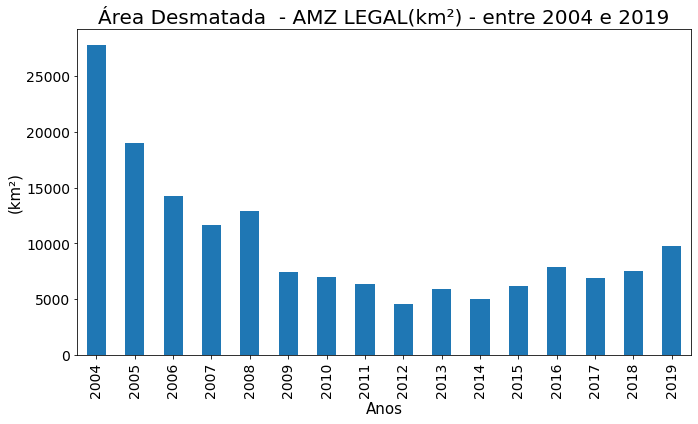

In [67]:
###Análise da área desmatada na Amazônia Legal
print("Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019")
grafico_barras_amz = tabela_areas_desmatadas['AMZ LEGAL - Área desmatada (km²)'].plot(kind = 'bar', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Área Desmatada  - AMZ LEGAL(km²) - entre 2004 e 2019", fontsize = 20)
grafico_barras_amz.set_ylabel("(km²)",fontsize=15)
grafico_barras_amz.set_xlabel("Anos",fontsize=15)

Quantidade de Focos de Incêndio - 2004


Text(0.5, 0, 'Qtd. focos de incêndio')

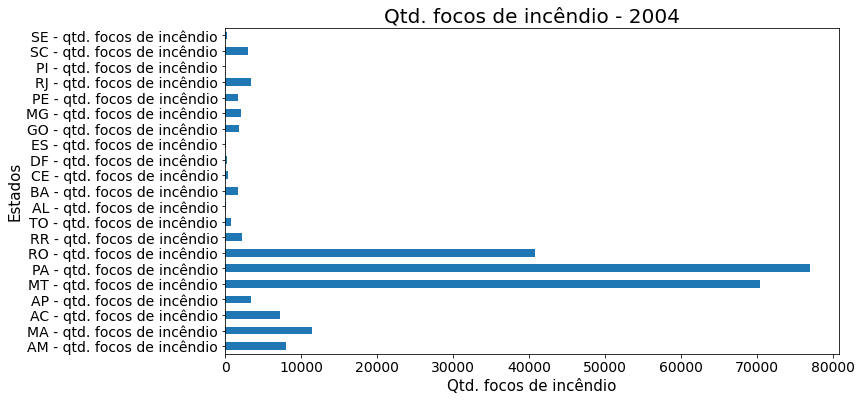

In [68]:
##############Análise para os focos de queimadas para o ano com maior índice de desmatamento
print("Quantidade de Focos de Incêndio - 2004")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[2004].plot(kind = 'barh', figsize = (11,6),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2004", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2005,2006


Text(0.5, 0, 'Qtd. focos de incêndio')

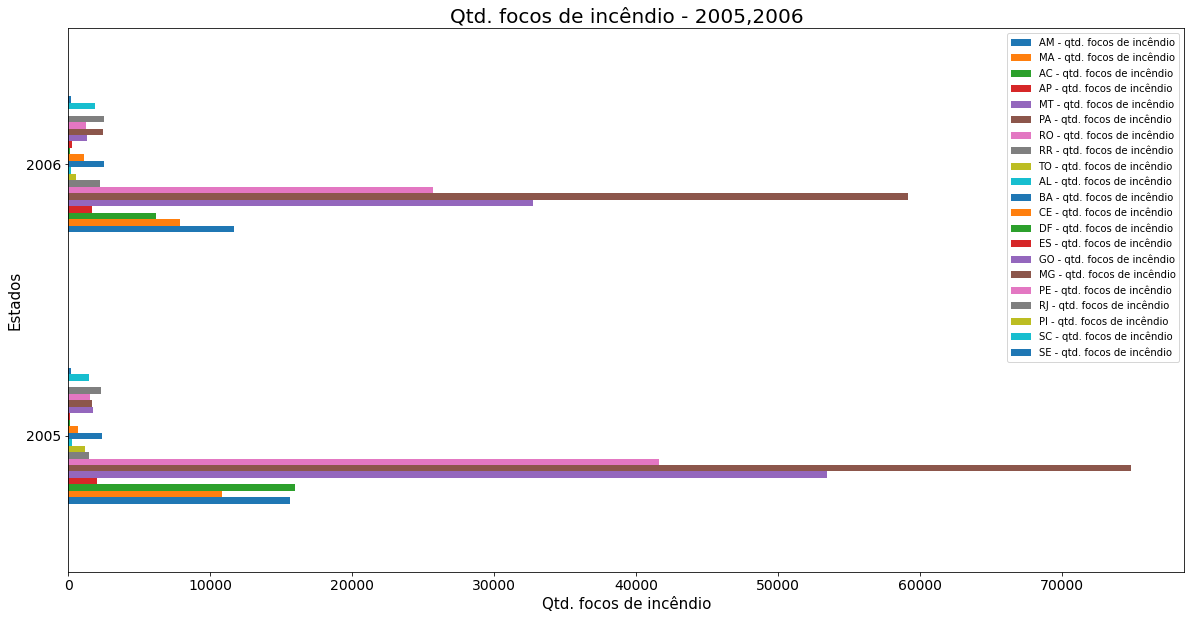

In [69]:
##############Análise para os focos de queimadas no ano 2005 e 2006
print("Quantidade de Focos de Incêndio - 2005,2006")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2005,2006]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2005,2006", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2007,2008


Text(0.5, 0, 'Qtd. focos de incêndio')

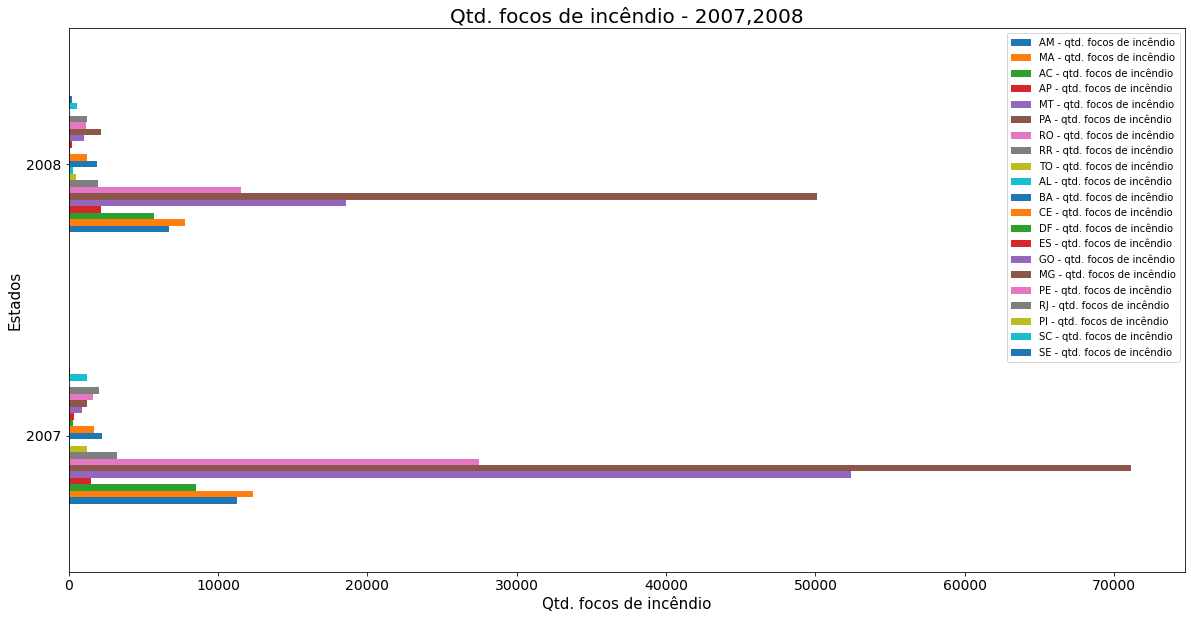

In [70]:
##############Análise para os focos de queimadas no ano 2007 e 2008
print("Quantidade de Focos de Incêndio - 2007,2008")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2007,2008]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2007,2008", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2008,2009


Text(0.5, 0, 'Qtd. focos de incêndio')

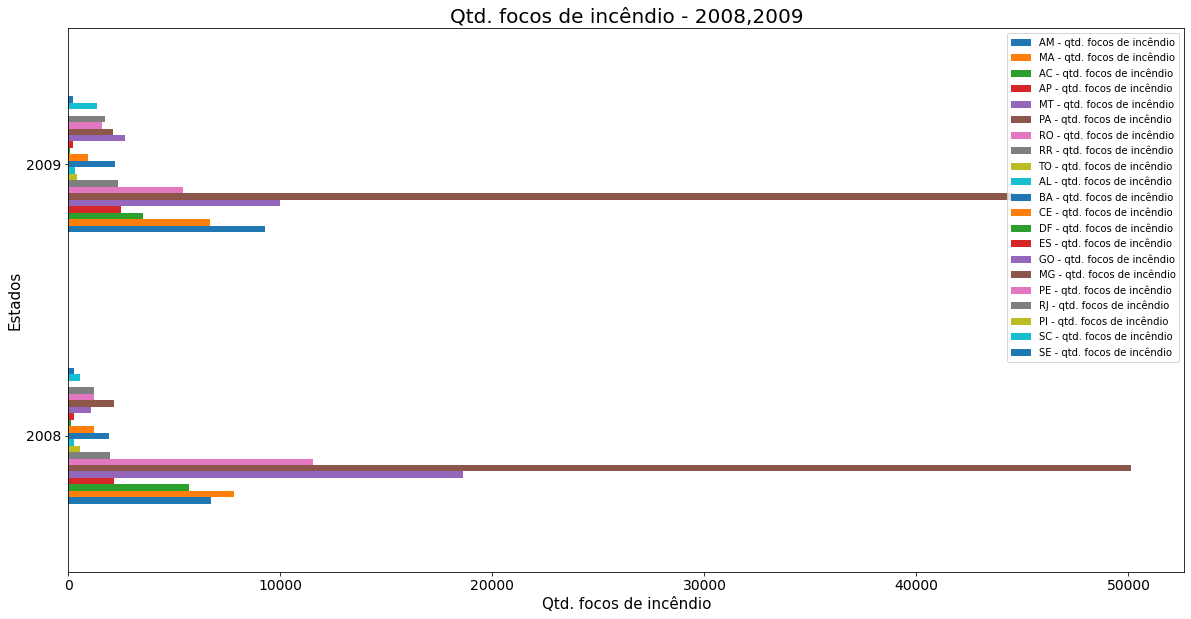

In [71]:
##############Análise para os focos de queimadas no ano 2008 e 2009
print("Quantidade de Focos de Incêndio - 2008,2009")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2008,2009]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2008,2009", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2010,2011


Text(0.5, 0, 'Qtd. focos de incêndio')

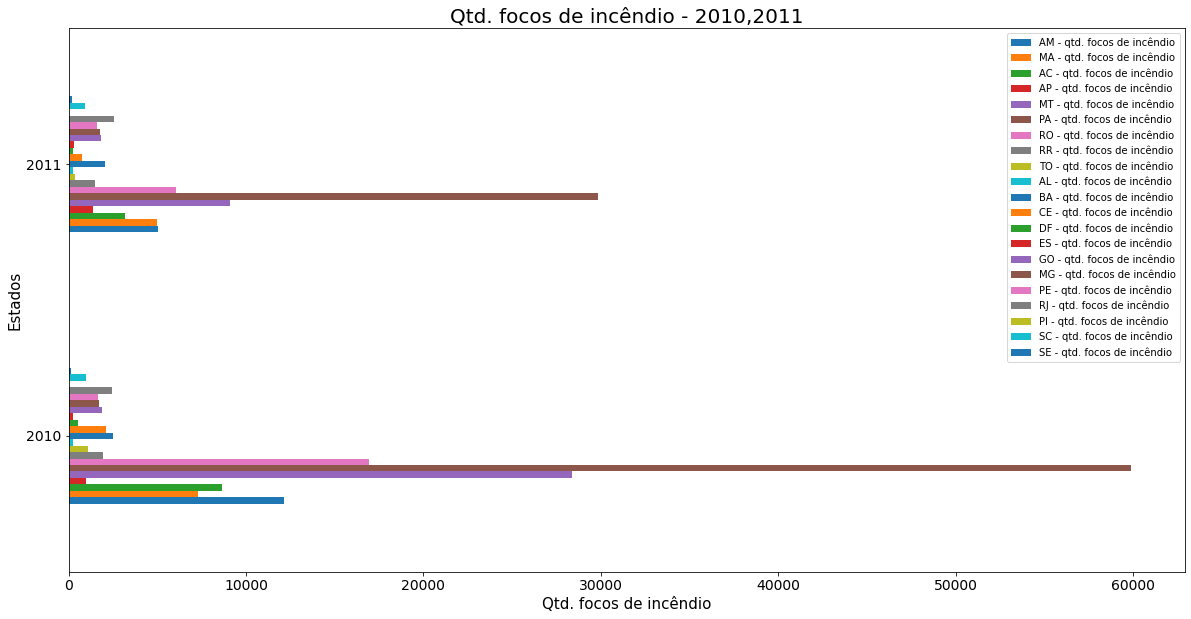

In [72]:
##############Análise para os focos de queimadas no ano 2010 e 2011
print("Quantidade de Focos de Incêndio - 2010,2011")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2010,2011]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2010,2011", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2011,2012


Text(0.5, 0, 'Qtd. focos de incêndio')

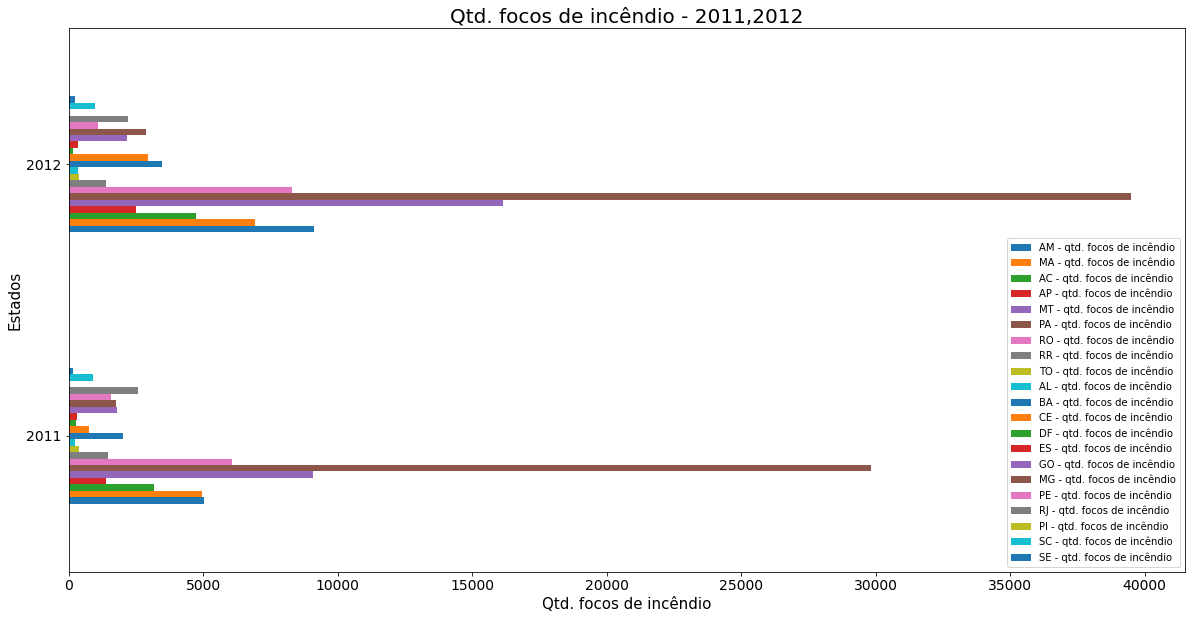

In [73]:
##############Análise para os focos de queimadas no ano 2011 e 2012
print("Quantidade de Focos de Incêndio - 2011,2012")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2011,2012]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2011,2012", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2012,2013


Text(0.5, 0, 'Qtd. focos de incêndio')

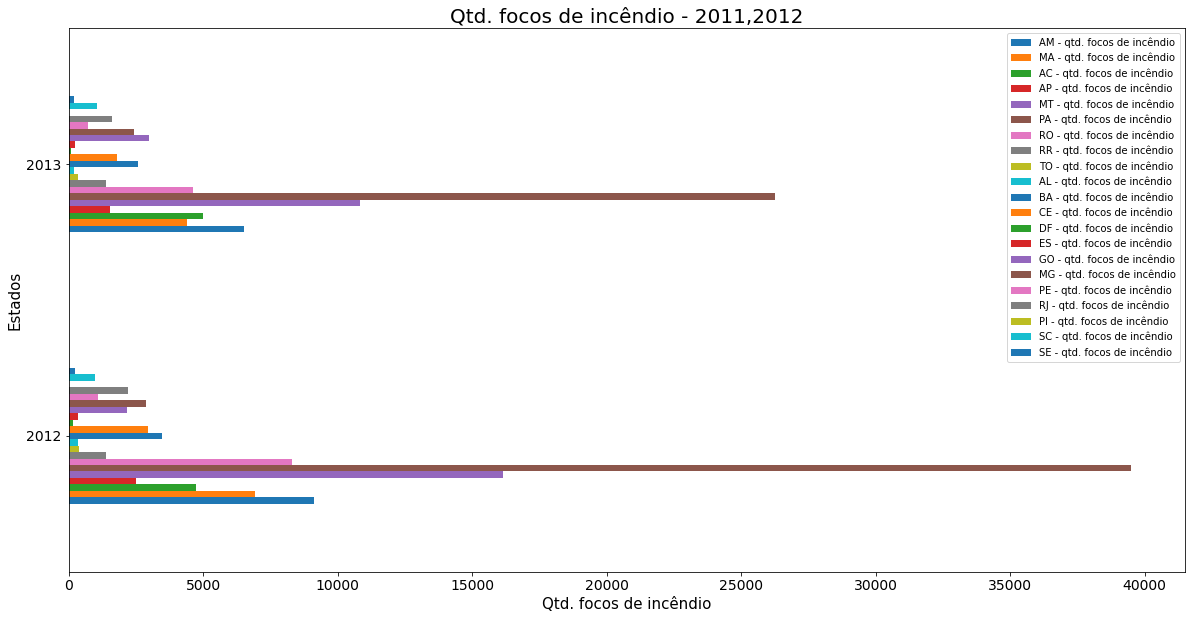

In [74]:
##############Análise para os focos de queimadas no ano 2012 e 2013
print("Quantidade de Focos de Incêndio - 2012,2013")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2012,2013]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2011,2012", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2014,2015


Text(0.5, 0, 'Qtd. focos de incêndio')

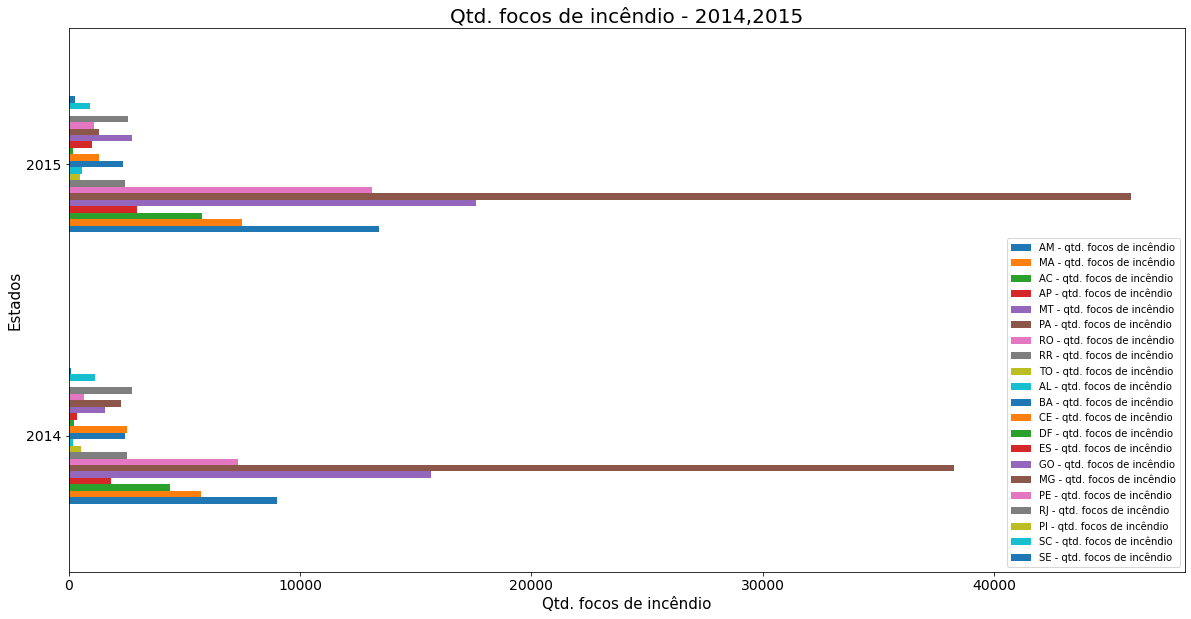

In [75]:
##############Análise para os focos de queimadas no ano 2014 e 2015
print("Quantidade de Focos de Incêndio - 2014,2015")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2014,2015]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2014,2015", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2015,2016


Text(0.5, 0, 'Qtd. focos de incêndio')

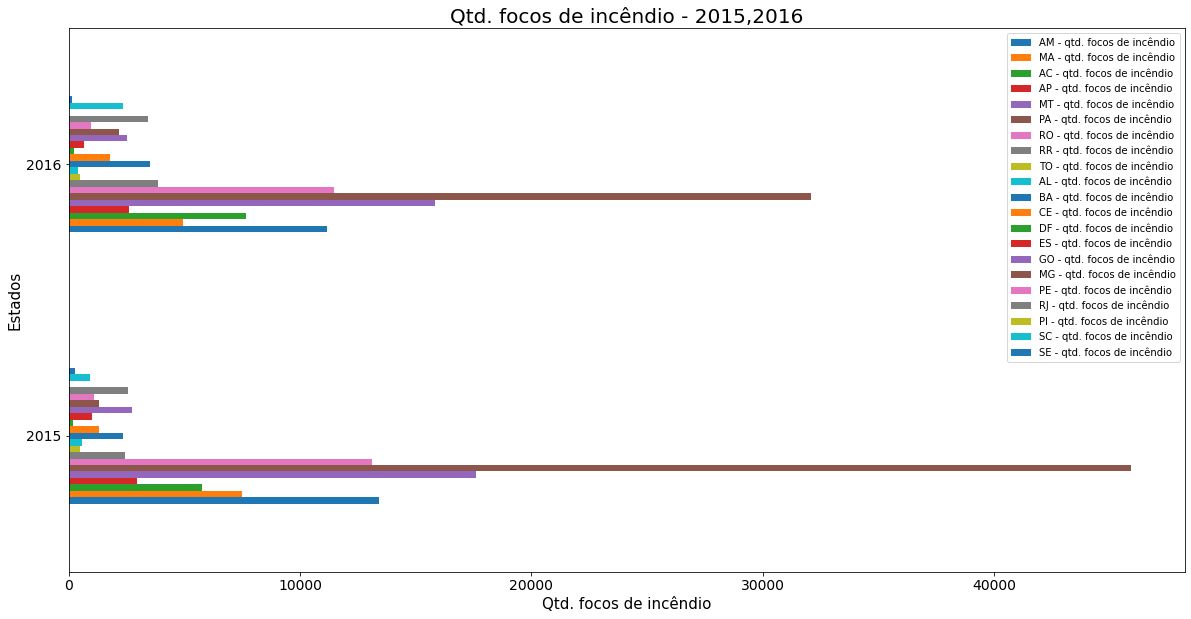

In [76]:
##############Análise para os focos de queimadas no ano 2015 e 2016
print("Quantidade de Focos de Incêndio - 2015,2016")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2015,2016]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2015,2016", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2016,2017


Text(0.5, 0, 'Qtd. focos de incêndio')

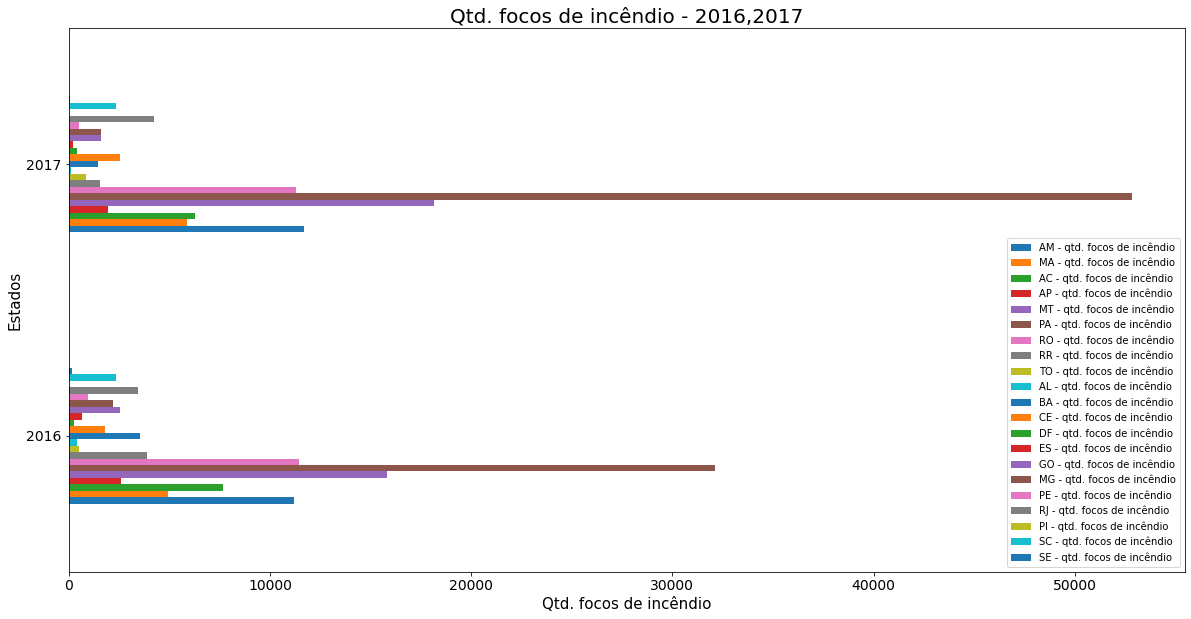

In [77]:
##############Análise para os focos de queimadas no ano 2016 e 2017
print("Quantidade de Focos de Incêndio - 2016,2017")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2016,2017]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2016,2017", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

Quantidade de Focos de Incêndio - 2018,2019


Text(0.5, 0, 'Qtd. focos de incêndio')

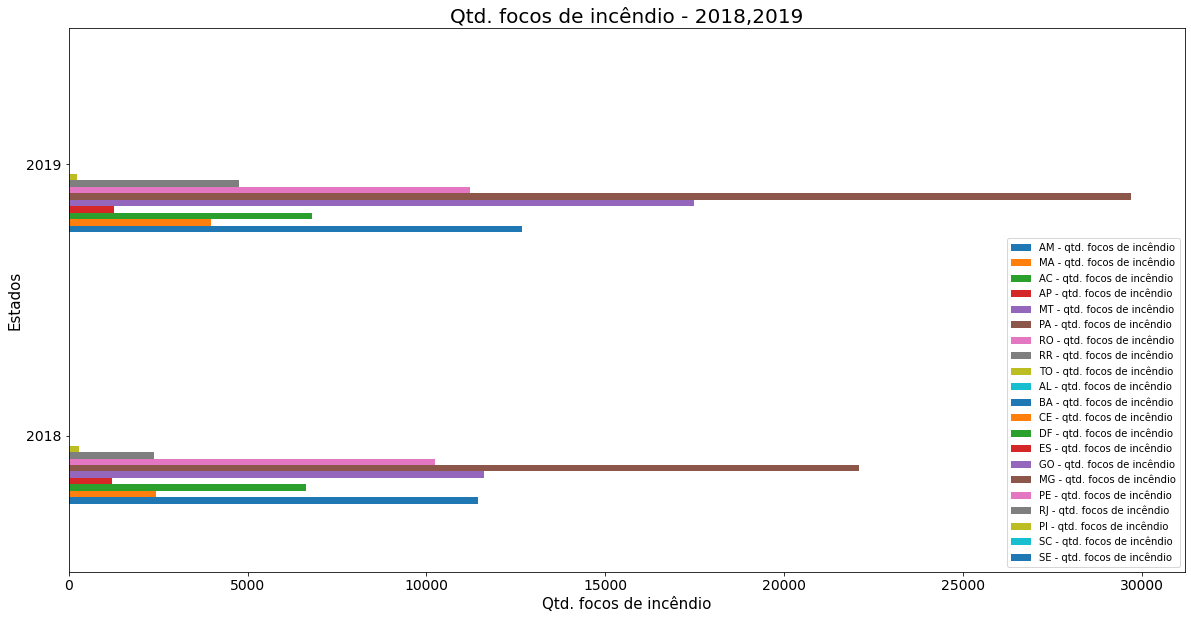

In [78]:
##############Análise para os focos de queimadas no ano 2018 e 2019
print("Quantidade de Focos de Incêndio - 2018,2019")
grafico_barras_amz = df_queimadas_group_by_sem_mes[['AM - qtd. focos de incêndio','MA - qtd. focos de incêndio',
       'AC - qtd. focos de incêndio', 'AP - qtd. focos de incêndio',
       'MT - qtd. focos de incêndio', 'PA - qtd. focos de incêndio',
       'RO - qtd. focos de incêndio', 'RR - qtd. focos de incêndio',
       'TO - qtd. focos de incêndio', 'AL - qtd. focos de incêndio',
       'BA - qtd. focos de incêndio', 'CE - qtd. focos de incêndio',
       'DF - qtd. focos de incêndio', 'ES - qtd. focos de incêndio',
       'GO - qtd. focos de incêndio', 'MG - qtd. focos de incêndio',
       'PE - qtd. focos de incêndio', 'RJ - qtd. focos de incêndio',
       'PI - qtd. focos de incêndio', 'SC - qtd. focos de incêndio',
       'SE - qtd. focos de incêndio' ]].loc[[2018,2019]].plot(kind = 'barh', figsize = (20,10),fontsize=14)
grafico_barras_amz.set_title("Qtd. focos de incêndio - 2018,2019", fontsize = 20)
grafico_barras_amz.set_ylabel("Estados",fontsize=15)
grafico_barras_amz.set_xlabel("Qtd. focos de incêndio",fontsize=15)

In [79]:
#####################################Análises e criação do modelo###################################

C:\Users\alyne\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


array([[<AxesSubplot:title={'center':'AM - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'MA - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'AC - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'AP - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'MT - qtd. focos de incêndio'}>],
       [<AxesSubplot:title={'center':'PA - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'RO - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'RR - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'TO - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'AL - qtd. focos de incêndio'}>],
       [<AxesSubplot:title={'center':'BA - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'CE - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'DF - qtd. focos de incêndio'}>,
        <AxesSubplot:title={'center':'ES - qtd. focos de incêndio'}>,
        <AxesSubpl

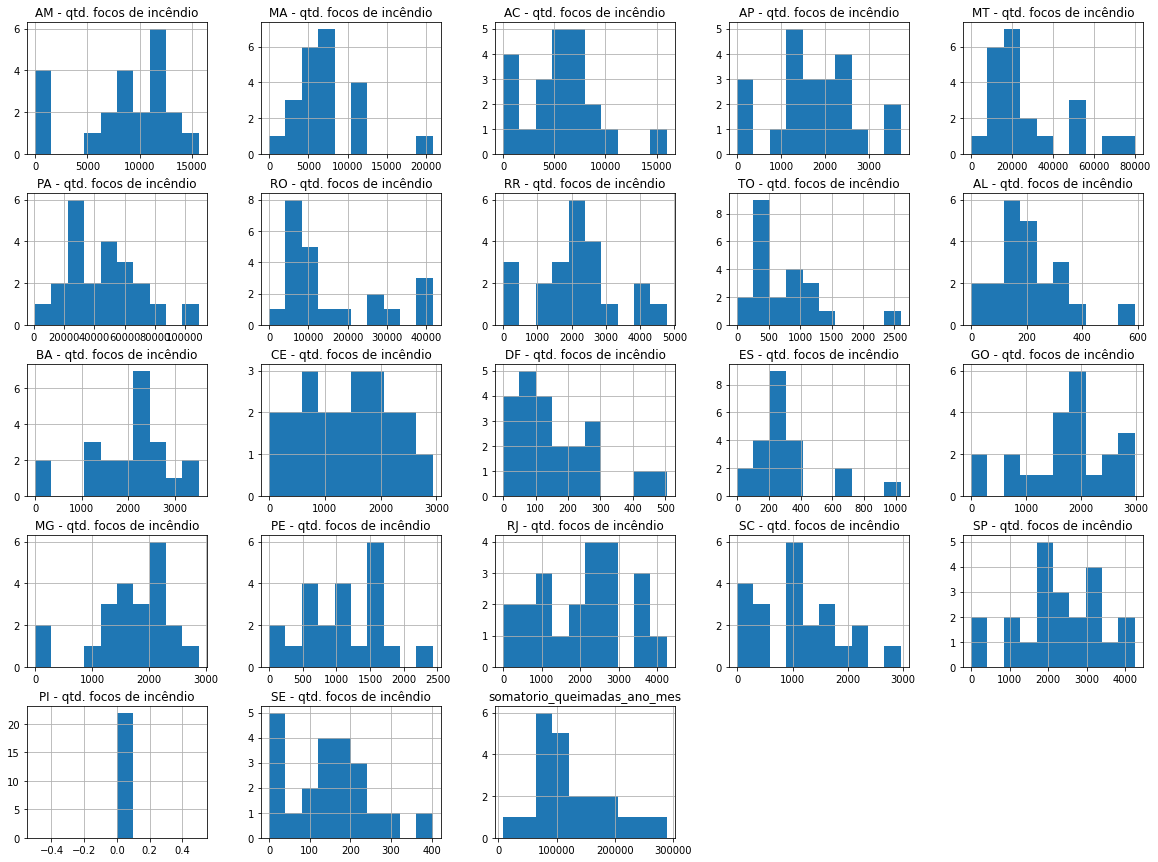

In [80]:
#Análise da discrepância dos valores de variáveis
fig = plt.figure(figsize = (20,15))
ax = fig.gca()

df_queimadas_group_by_sem_mes.hist(bins=10,ax=ax)

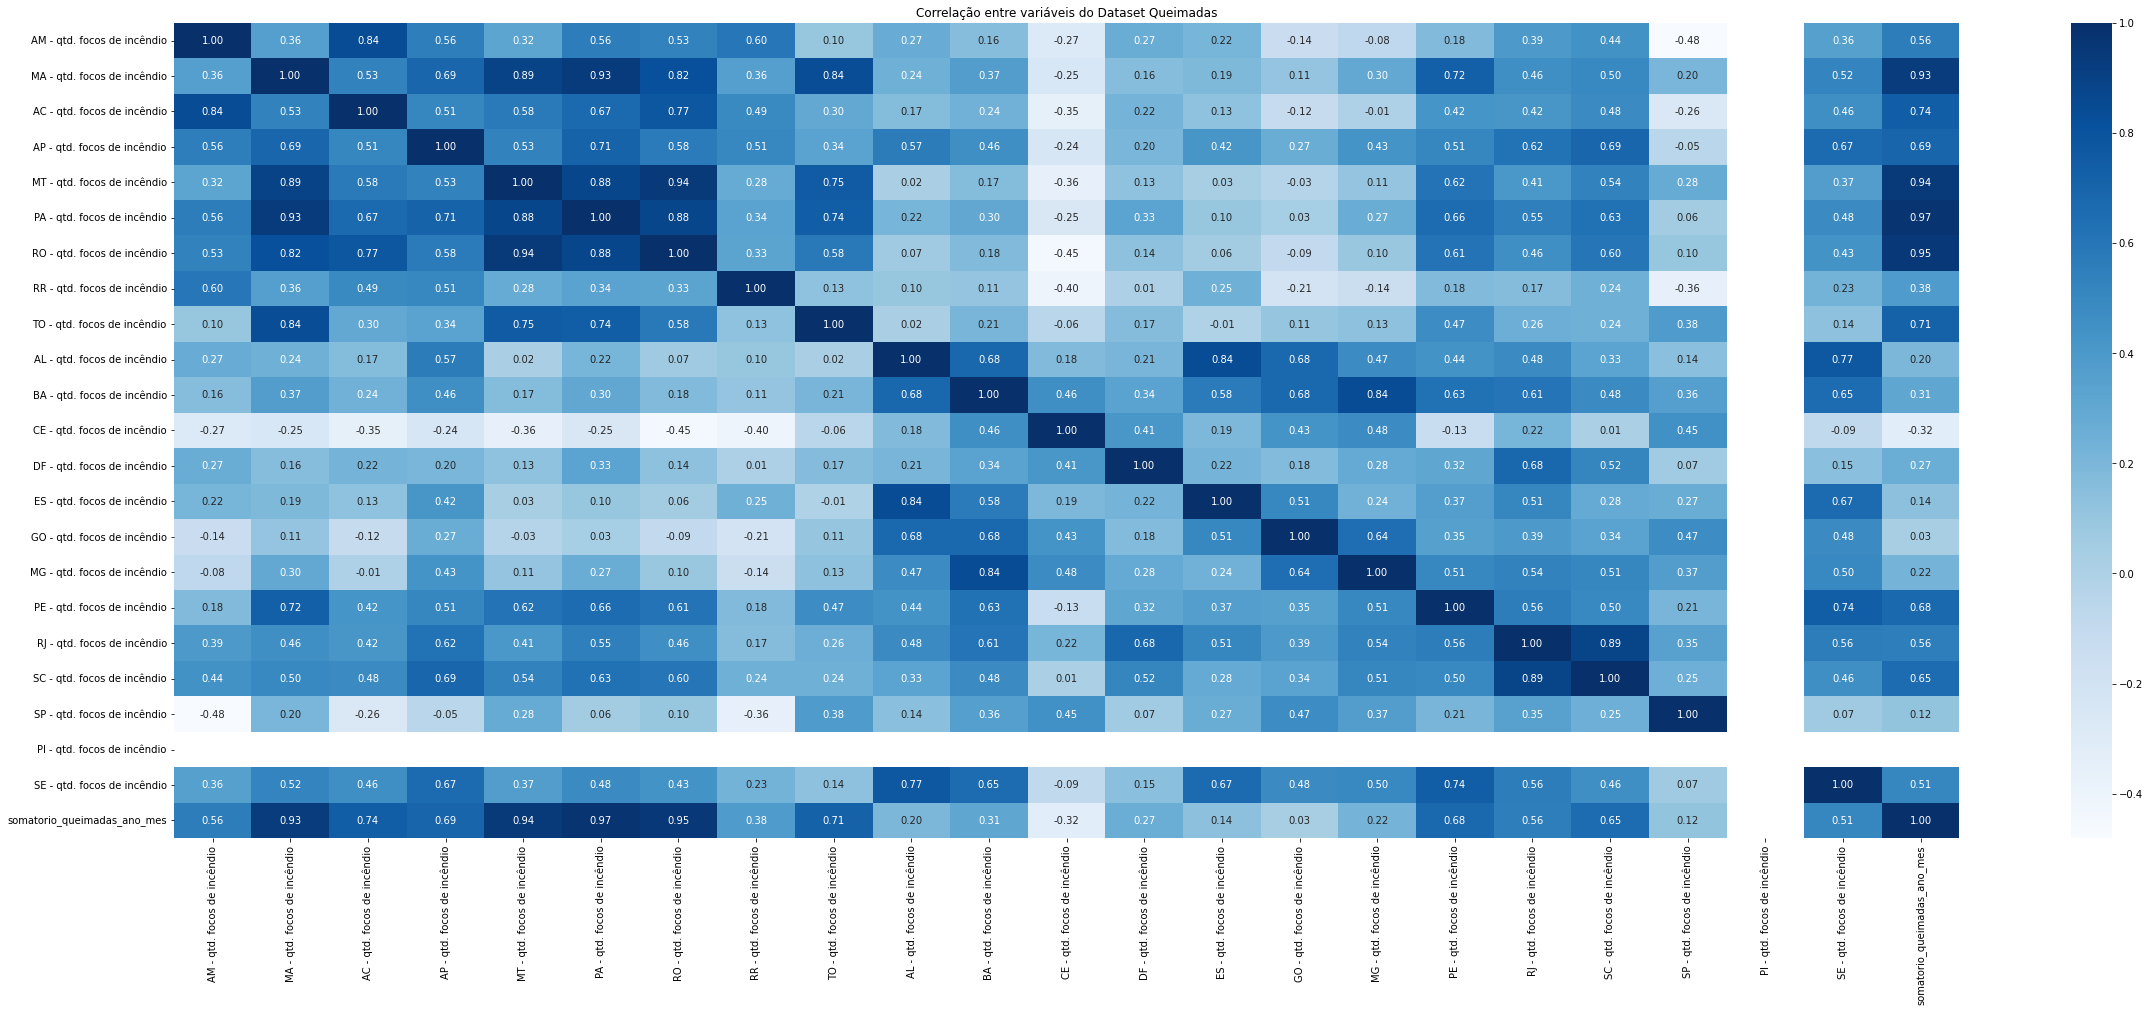

In [81]:
#buscando correlacionamento
fig = plt.figure(figsize = (40,15))
ax = fig.gca()
sns.heatmap(df_queimadas_group_by_sem_mes.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues',ax=ax)
plt.title('Correlação entre variáveis do Dataset Queimadas')
plt.show()

In [82]:
df_queimadas_group_by_sem_mes.reset_index( inplace=True)

In [175]:
df_queimadas_group_by = df_queimadas_group_by.loc[df_queimadas_group_by['Anos']>=2000]

In [176]:
#Separa features(matriz X:colunas usadas para fazer a predição) de target (coluna y:coluna se quer prever)
target = "somatorio_queimadas_ano_mes"
X = df_queimadas_group_by[['Anos','mês']]
y = df_queimadas_group_by[target]

In [177]:
X

,Anos,mês
24,2000,1
25,2000,2
26,2000,3
27,2000,4
28,2000,5
...,...,...
259,2019,8
260,2019,9
261,2019,10
262,2019,11


In [178]:
y

24       363.0
25       419.0
26       725.0
27       298.0
28      1200.0
        ...   
259    30900.0
260    19925.0
261     7855.0
262    11297.0
263     2234.0
Name: somatorio_queimadas_ano_mes, Length: 240, dtype: float64

In [179]:
#Gera dados de teste e de treino
#train_test_split: separar a base de treino e teste
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.5, random_state=0)


In [180]:
xTrain

,Anos,mês
26,2000,3
83,2004,12
170,2012,3
247,2018,8
67,2003,8
...,...,...
91,2005,8
216,2016,1
141,2009,10
71,2003,12


In [181]:
##################Regressão Linear#############################
#Define classificador utilizado e treina
classifier_lm = LinearRegression()
classifier_lm.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
##########Validação Cruzada para a Regressão Linear
kfold  = KFold(n_splits=2, shuffle=True) 

In [183]:
### Aplicação do Kfold no modelo de Regressão linear
lm_resultado = cross_val_score(classifier_lm, xTrain, yTrain, cv = kfold)

In [184]:
print("Linear Regression Mean (R^2): {0}\n".format(lm_resultado.mean()))

Linear Regression Mean (R^2): 0.20932721157944573



In [185]:
#Faz predicao com o modelo de teste
yPred = classifier_lm.predict(xTest)

#xTest = [["Amazonia", "Janeiro", 2019], ["Amazonia", "Janeiro", 2022]]


In [186]:
classifier_lm.score(xTest, yTest)

0.2780792244381408

In [187]:
#Verificar a precisão do modelo
prediction_relative_error = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]


In [188]:
#Ordenar a base de testes por ano
xTestSorted = xTest.sort_index(axis=0)
yTestSorted = [yTest[index] for index in xTestSorted.index]

In [189]:
xTest

,Anos,mês
133,2009,2
95,2005,12
61,2003,2
98,2006,3
132,2009,1
...,...,...
259,2019,8
162,2011,7
233,2017,6
86,2005,3


In [190]:
#Criação de novo dataframe para análise dos valores de predição, erro e o valor que será previsto
df_regressao_linear = xTest.copy()
df_regressao_linear['prediction'] = yPred
df_regressao_linear['relative_error'] = prediction_relative_error
df_regressao_linear['Somatório focos de Incêndio'] = yTest
df_regressao_linear

,Anos,mês,prediction,relative_error,Somatório focos de Incêndio
133,2009,2,3156.639254,303.146776,783.00
95,2005,12,25474.346403,226.746666,7796.36
61,2003,2,5620.754274,151.825908,2232.00
98,2006,3,6456.193144,328.982933,1505.00
132,2009,1,1089.142874,56.381943,2497.00
...,...,...,...,...,...
259,2019,8,11454.759169,62.929582,30900.00
162,2011,7,12672.749482,154.115690,4987.00
233,2017,6,8141.138082,139.939230,3393.00
86,2005,3,6866.878981,346.190967,1539.00


In [191]:
#Ordenar valores anos do nova dataframe
df_regressao_linear = df_regressao_linear.sort_values(by='Anos')

In [217]:
df_regressao_linear.set_index(['Anos','mês'],inplace = True)

Text(0.5, 1.0, 'Predição vs Queimadas - Regressão Linear')

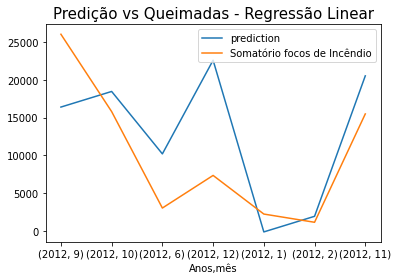

In [231]:
df_regressao_linear[['prediction','Somatório focos de Incêndio']].loc[[2012]].plot().set_title("Predição vs Queimadas - Regressão Linear", fontsize = 15)

<AxesSubplot:xlabel='Somatório focos de Incêndio', ylabel='prediction'>

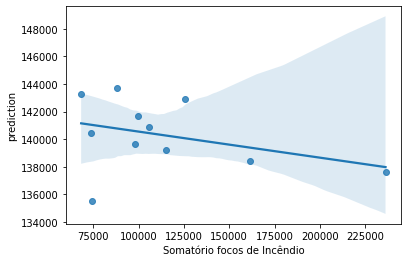

In [101]:
#Para melhor análise da precisão
sns.regplot(x = df_regressao_linear['Somatório focos de Incêndio'], 
            y = df_regressao_linear['prediction'], 
            
            data = df_regressao_linear)

In [102]:
#Métricas de Performance
#Dados de teste
mae_test = m.mean_absolute_error(yTest,yPred)
mape_test = np.mean(np.abs(yTest-yPred)/yTest)

In [103]:
#Verificar o MAE - Curso #Erro Percentual Médio Absoluto (MAPE)
data_MAE = {
    'DataFrame':['test'],
    'MAE':[mae_test],
    'MAPE':[mape_test]
}
df_mp = pd.DataFrame(data_MAE)
df_mp
#Nos dados de teste, a cada predição que fizer o modelo pode estar 0.011% errado

,DataFrame,MAE,MAPE
0,test,49057.677805,0.502736


In [104]:
######################Modelo de Rede Neural#########################################################
#Define classificador utilizado e treina
classifier_neural = MLPRegressor()
classifier_neural.fit(xTrain, yTrain)

#Faz predicao com o modelo de teste
yPred = classifier_neural.predict(xTest)



C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [105]:
####Validação Cruzada para a Rede Neural
Neural_resultado = cross_val_score(classifier_neural, xTrain, yTrain, cv = kfold)
print("Neural Mean (R^2): {0}\n".format(Neural_resultado.mean()))

Neural Mean (R^2): -2.6223376981199156



C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\alyne\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [106]:
#Verificar a precisão do modelo
prediction_relative_error_neural = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]

In [107]:
#Criação de novo dataframe para análise dos valores de predição para rede neural, erro e o valor que será previsto
df_teste_neural = xTest.copy()
df_teste_neural['prediction'] = yPred
df_teste_neural['relative_error'] = prediction_relative_error_neural
df_teste_neural['Somatório focos de Incêndio'] = yTest
df_teste_neural

,Anos,prediction,relative_error,Somatório focos de Incêndio
20,2018,7529.437801,88.983191,68345.000
10,2008,7492.139758,93.502269,115303.936
14,2012,7507.058975,92.909387,105873.206
13,2011,7503.329171,89.850332,73926.847
1,1999,7458.571520,89.987961,74496.027
21,2019,7533.167605,91.452695,88135.000
11,2009,7495.869563,92.351246,98001.182
19,2017,7525.707997,94.008698,125610.552
8,2006,7484.680150,95.360395,161321.501
6,2004,7477.220541,96.834888,236238.736


In [108]:
#Ordenar valores anos do nova dataframe
df_teste_neural = df_teste_neural.sort_values(by='Anos')

Text(0.5, 1.0, 'Predição vs Incêndios')

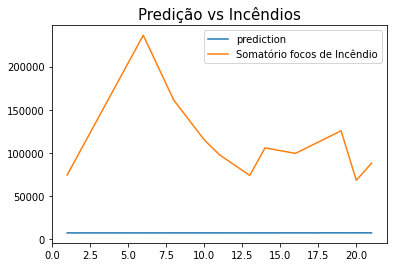

In [109]:
df_teste_neural[['prediction','Somatório focos de Incêndio']].plot().set_title("Predição vs Incêndios", fontsize = 15)

In [110]:
#Métricas de Performance - Para rede neural
#Dados de teste
mae_test = m.mean_absolute_error(yTest,yPred)
mape_test = np.mean(np.abs(yTest-yPred)/yTest)

In [111]:
data_MAE = {
    'DataFrame':['test'],
    'MAE':[mae_test],
    'MAPE':[mape_test]
}
df_mp = pd.DataFrame(data_MAE)
df_mp

,DataFrame,MAE,MAPE
0,test,105842.077303,0.925174


In [112]:
###########################MODELO SVM###########################

In [113]:
#criando uma instância para o SVC
clf = svm.SVC()

In [114]:
#Necessário alterar o tipo do dado
yTrain = yTrain.astype(int)

In [115]:
#treinando o modelo
clf.fit(xTrain,yTrain)
yPred = clf.predict(xTest)



In [116]:
#Verificar a precisão do modelo
prediction_relative_error_svm = [100*abs(pair[0] - pair[1])/pair[1] for pair in list(zip(yPred,yTest))]

In [117]:
df_teste_SVM = xTest.copy()
df_teste_SVM['prediction'] = yPred
df_teste_SVM['relative error'] = prediction_relative_error_svm
df_teste_SVM['Somatório de qtd. de Incêndios'] = yTest
df_teste_SVM

,Anos,prediction,relative error,Somatório de qtd. de Incêndios
20,2018,108362,58.551467,68345.000
10,2008,200996,74.318420,115303.936
14,2012,74842,29.309782,105873.206
13,2011,151707,105.212323,73926.847
1,1999,60580,18.680227,74496.027
21,2019,108362,22.950020,88135.000
11,2009,151707,54.801194,98001.182
19,2017,108362,13.731770,125610.552
8,2006,229470,42.243903,161321.501
6,2004,229470,2.865210,236238.736


In [118]:
df_teste_SVM = df_teste_SVM.sort_values(by='Anos')

Text(0.5, 1.0, 'Somatório de qtd. de Incêndios')

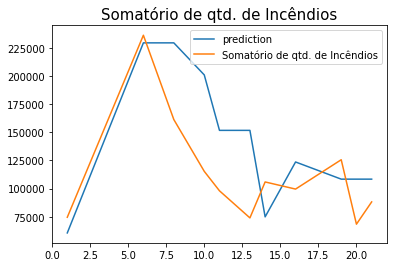

In [119]:
df_teste_SVM[['prediction','Somatório de qtd. de Incêndios']].plot().set_title("Somatório de qtd. de Incêndios", fontsize = 15)

<AxesSubplot:xlabel='Somatório de qtd. de Incêndios', ylabel='prediction'>

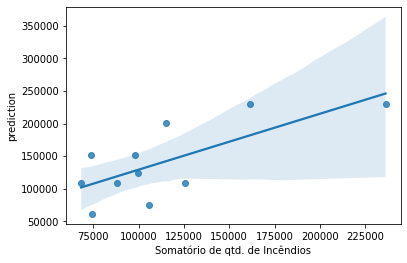

In [120]:
#Para melhor análise da precisão
sns.regplot(x = df_teste_SVM['Somatório de qtd. de Incêndios'], 
            y = df_teste_SVM['prediction'], 
            
            data = df_teste_SVM)

In [121]:
#Métricas de Performance - Para SVM
#Dados de teste
mae_test = m.mean_absolute_error(yTest,yPred)
mape_test = np.mean(np.abs(yTest-yPred)/yTest)

In [122]:
data_MAE = {
    'DataFrame':['test'],
    'MAE':[mae_test],
    'MAPE':[mape_test]
}
df_mp = pd.DataFrame(data_MAE)
df_mp

,DataFrame,MAE,MAPE
0,test,39875.135455,0.406244
